# Regresion Basica: Predecir eficiencia de gasolina

Este libro usa el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) y construye un modelo para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Este ejemplo usa el API `tf.keras` , revise [Esta Guia](https://www.tensorflow.org/guide/keras) para obtener mas detalles.

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf

## El set de Datos de MPG

El set de datos esta disponible de el siguiente repositorio [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

### Obtenga los datos
Primero descargue el set de datos.
keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [160]:
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\misla\\.keras\\datasets\\auto-mpg.data'

Importelo usando pandas.

In [161]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']

In [162]:
# df = pd.read_fwf(dataset_path, names= column_names)
# Origin representa USA (1), Europa (2), Asia (3) 
df = pd.read_csv(dataset_path, names= column_names, delim_whitespace=True) # na_values=['?']
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


### Limpia los datos

Trata los missings y variables categóricas

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [122]:
df['Horsepower'].astype(float)

ValueError: could not convert string to float: '?'

In [163]:
df['Horsepower'][df['Horsepower'] == '?'] = np.nan

C:\Users\misla\AppData\Local\Temp\ipykernel_27492\3400488426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Horsepower'][df['Horsepower'] == '?'] = np.nan


In [164]:
df['Horsepower'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: Horsepower
Non-Null Count  Dtype 
--------------  ----- 
392 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


C:\Users\misla\AppData\Local\Temp\ipykernel_27492\4028433040.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Horsepower'])


<Axes: xlabel='Horsepower', ylabel='Density'>

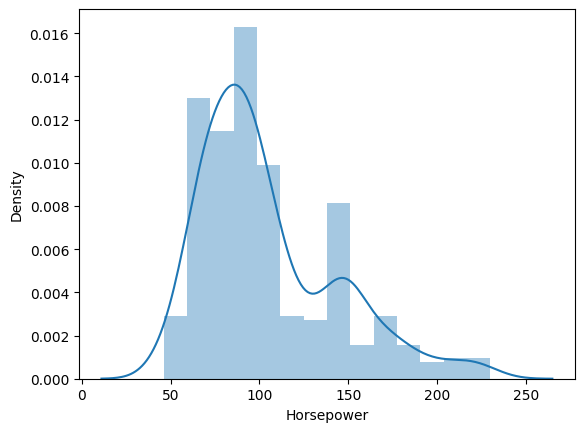

In [127]:
sns.distplot(df['Horsepower'])

In [167]:
df['Horsepower'] = df['Horsepower'].astype(float)

In [176]:
np.nanmedian(df['Horsepower'])

93.5

In [177]:
df['Horsepower'] = df['Horsepower'].fillna(np.nanmedian(df['Horsepower']))

In [178]:
df['Horsepower'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: Horsepower
Non-Null Count  Dtype  
--------------  -----  
398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [ ]:
# # Crear una nueva columna 'Brand' que contiene solo las marcas
# df['Brand'] = df['Car Name'].str.split(' ', n=1).str[0]

# # Mostrar las marcas
# unique_brands = df['Brand'].unique()
# print(unique_brands)

In [ ]:
# categorical_columns = ['Brand']

# df_encoded = pd.get_dummies(df, columns=categorical_columns)
# df_encoded = df_encoded.astype(int)

In [181]:
df.drop(columns= 'Car Name', inplace= True)

In [182]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [183]:
df = pd.concat([df, pd.get_dummies(df['Origin'])], axis= 1)

In [184]:
df.drop(columns= 'Origin', inplace= True)

In [185]:
df.rename(columns={1: 'USA', 2: 'Europa', 3: 'Asia'},inplace= True)

In [186]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europa,Asia
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0


### Divide los datos en train y test

Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo.

NOTA: El resultado tienen que ser dos datasets

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
X = df.iloc[:, 1::]
Y = df['MPG']

In [189]:
X.shape

(398, 9)

In [190]:
Y.shape

(398,)

In [191]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.20, random_state= 42)

### Inspecciona los datos

Revise rapidamente la distribucion conjunta del dataset de entrenamiento mediante un grid de gráficos

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


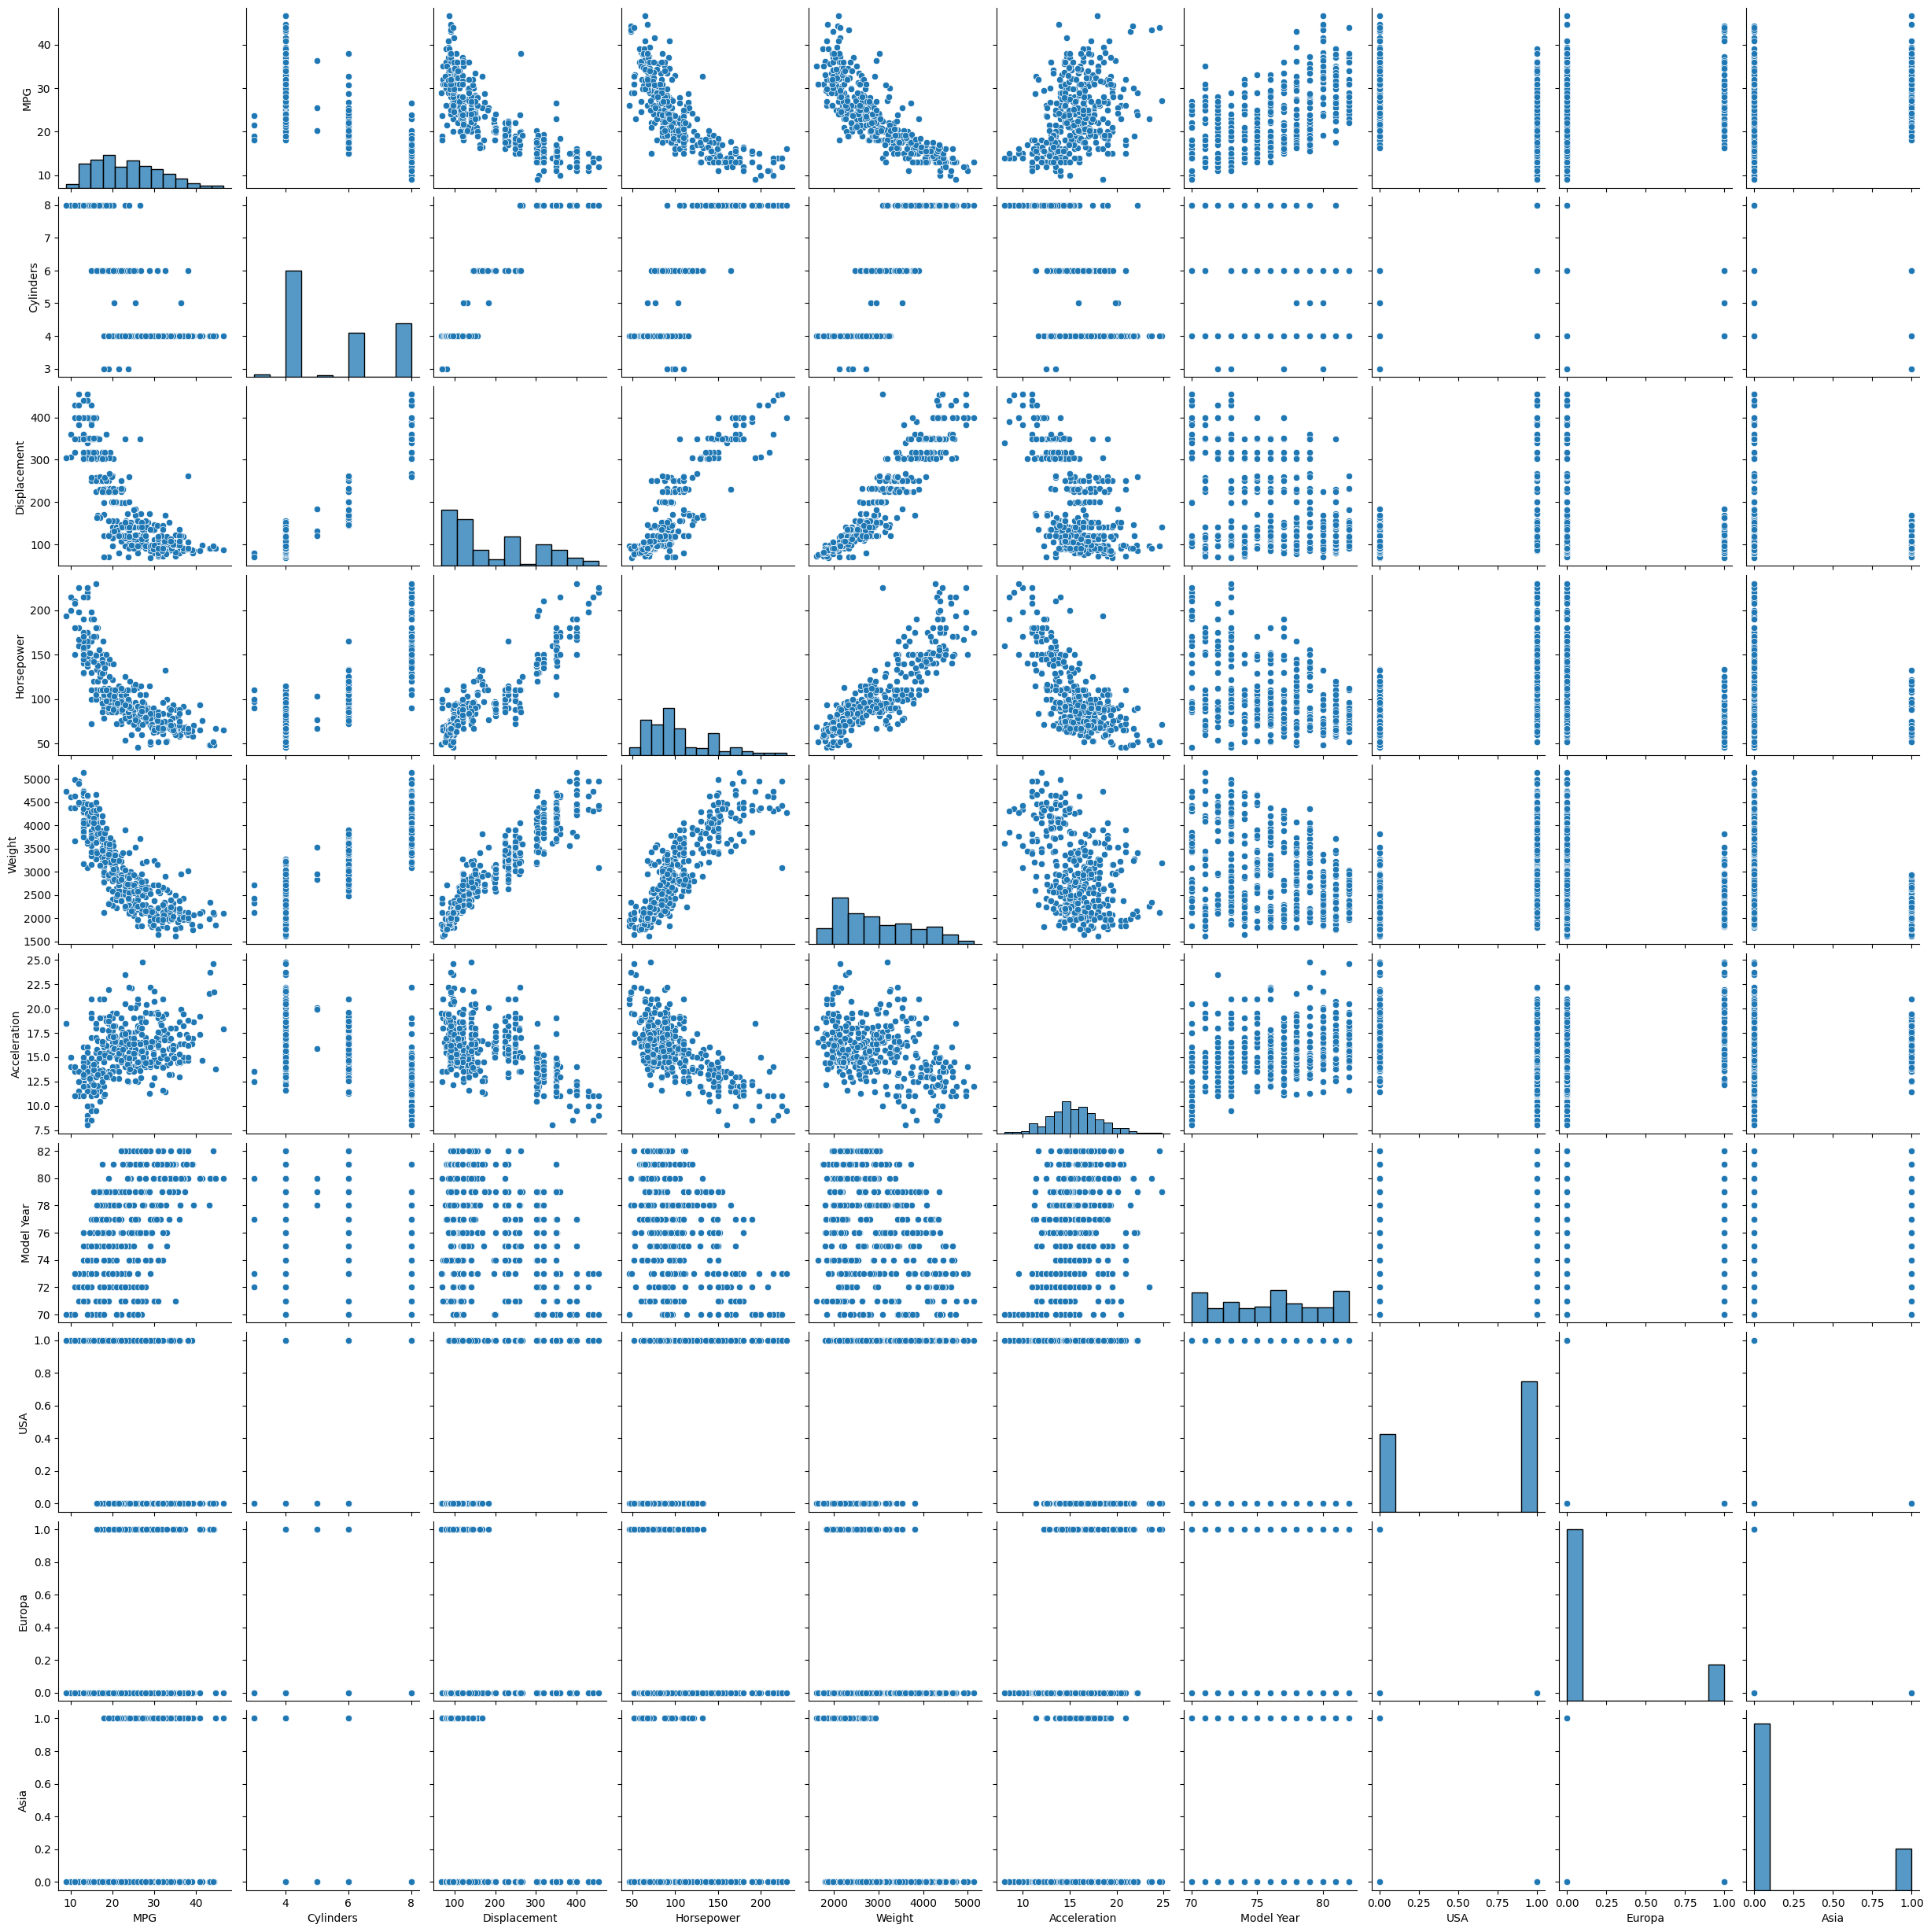

In [192]:
sns.pairplot(df);

Tambien revise las estadisticas generales:

In [193]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europa,Asia
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,0.625628,0.175879,0.198492
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.484569,0.381197,0.399367
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


### Separa las features del target

Separe el target de las features.

In [ ]:
#Hecho arriba

### Estandariza los datos

Es una buena práctica estandarizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo podría converger sin estandarizar, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.

In [194]:
from sklearn.preprocessing import StandardScaler

In [197]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

In [201]:
X_train_scal.mean()

-1.7316686170254015e-16

In [202]:
np.std(X_train_scal)

1.0

In [199]:
# scaler.transform(X_train_scal)

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-2.32041786, -1.85577362, -2.75109438, ...,  0.35494853,
        -1.67606119, -1.77367108],
       [-3.73378577, -1.87535306, -2.79631697, ..., -3.87405782,
        -1.67606119,  4.3064155 ],
       [-3.73378577, -1.87592058, -2.8109049 , ..., -3.87405782,
        -1.67606119,  4.3064155 ],
       ...,
       [-3.73378577, -1.87185335, -2.79121119, ..., -3.87405782,
        -1.67606119,  4.3064155 ],
       [-3.73378577, -1.87610976, -2.81528128, ..., -3.87405782,
        -1.67606119,  4.3064155 ],
       [-3.73378577, -1.87535306, -2.82695162, ..., -3.87405782,
         5.2162507 , -1.77367108]])

Estos datos estandarizados es lo que usaremos para entrenar el modelo.

## El modelo

### Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo.

Por tanto, tendrá tres capas. Una de entrada con activación relu. Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres para las dos primeras capas.

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

In [213]:
X_train.iloc[0].shape

(9,)

In [214]:
capas = [keras.layers.Dense(30, 'relu', input_shape = X_train.iloc[0].shape),
         keras.layers.Dense(20, 'relu'),
         keras.layers.Dense(1)]

model = keras.models.Sequential(capas)

In [215]:
model.compile(tf.keras.optimizers.RMSprop(0.001),
              'mse',
              ['mae', 'mse'])

In [211]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 30)                300       
                                                                 
 dense_22 (Dense)            (None, 20)                620       
                                                                 
 dense_23 (Dense)            (None, 1)                 21        
                                                                 
Total params: 941 (3.68 KB)
Trainable params: 941 (3.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [216]:
history = model.fit(X_train_scal,
          Y_train,
          batch_size= 32,
          epochs= 1000,
          validation_split= 0.20)

Epoch 1/1000
8/8 [==============================] - 1s 35ms/step - loss: 599.6970 - mae: 23.1315 - mse: 599.6970 - val_loss: 589.8220 - val_mae: 23.0741 - val_mse: 589.8220
Epoch 2/1000
8/8 [==============================] - 0s 9ms/step - loss: 581.6050 - mae: 22.7647 - mse: 581.6050 - val_loss: 573.0858 - val_mae: 22.7336 - val_mse: 573.0858
Epoch 3/1000
8/8 [==============================] - 0s 10ms/step - loss: 564.1438 - mae: 22.4070 - mse: 564.1438 - val_loss: 555.1165 - val_mae: 22.3664 - val_mse: 555.1165
Epoch 4/1000
8/8 [==============================] - 0s 12ms/step - loss: 545.3864 - mae: 22.0246 - mse: 545.3864 - val_loss: 535.5339 - val_mae: 21.9599 - val_mse: 535.5339
Epoch 5/1000
8/8 [==============================] - 0s 10ms/step - loss: 524.9134 - mae: 21.5909 - mse: 524.9134 - val_loss: 514.6780 - val_mae: 21.5156 - val_mse: 514.6780
Epoch 6/1000
8/8 [==============================] - 0s 11ms/step - loss: 502.3851 - mae: 21.1139 - mse: 502.3851 - val_loss: 491.6198 - 

### Inspeccione el modelo

Use el método `.summary` para imprimir una descripción simple del modelo

In [217]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 30)                300       
                                                                 
 dense_25 (Dense)            (None, 20)                620       
                                                                 
 dense_26 (Dense)            (None, 1)                 21        
                                                                 
Total params: 941 (3.68 KB)
Trainable params: 941 (3.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Entrenar el modelo

Entrene el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

NOTA: recuerda usar los datos normalizados.

In [ ]:
#Hecho arriba

Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`.

In [219]:
history.history

{'loss': [599.6969604492188,
  581.60498046875,
  564.143798828125,
  545.3863525390625,
  524.9133911132812,
  502.3851318359375,
  477.4453430175781,
  450.3536682128906,
  421.4054260253906,
  390.1692199707031,
  357.74151611328125,
  324.4462585449219,
  291.4169616699219,
  258.8375244140625,
  226.48814392089844,
  195.33851623535156,
  166.54898071289062,
  140.4851837158203,
  117.73690032958984,
  98.67216491699219,
  83.36503601074219,
  71.95255279541016,
  63.395408630371094,
  56.975059509277344,
  51.914066314697266,
  47.609519958496094,
  43.778228759765625,
  40.11282730102539,
  37.148101806640625,
  34.08454513549805,
  31.322656631469727,
  28.962997436523438,
  26.829063415527344,
  24.867830276489258,
  23.14397430419922,
  21.673616409301758,
  20.313207626342773,
  19.00011444091797,
  18.011693954467773,
  16.997821807861328,
  16.244035720825195,
  15.430840492248535,
  14.60376262664795,
  14.068166732788086,
  13.502195358276367,
  12.993789672851562,
  12.

In [221]:
history_df = pd.DataFrame(history.history)
history_df

,loss,mae,mse,val_loss,val_mae,val_mse
0,599.696960,23.131517,599.696960,589.821960,23.074078,589.821960
1,581.604980,22.764729,581.604980,573.085815,22.733582,573.085815
2,564.143799,22.407021,564.143799,555.116516,22.366449,555.116516
3,545.386353,22.024595,545.386353,535.533936,21.959869,535.533936
4,524.913391,21.590918,524.913391,514.677979,21.515551,514.677979
...,...,...,...,...,...,...
995,4.828416,1.473510,4.828416,7.465885,2.151654,7.465885
996,4.752424,1.463531,4.752424,7.461709,2.154974,7.461709
997,4.808755,1.466224,4.808755,7.392600,2.139430,7.392600
998,4.755921,1.461787,4.755921,7.320986,2.118061,7.320986


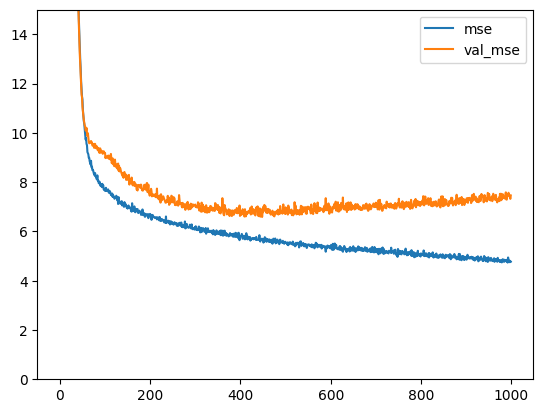

In [225]:
plt.plot(history_df['mse'], label = 'mse')
plt.plot(history_df['val_mse'], label = 'val_mse')
plt.legend()
plt.ylim(0, 15);

¿Alguna conclusión respecto a este gráfico?

In [ ]:
#Hay overfitting 

Observamos que si le damos muchas epochs al entrenamiento tiende a un overfitting, siendo el error en validación cada vez más alto. Sería interesante utilizar un número aprox de 30 epochs

In [227]:
capas = [keras.layers.Dense(30, 'relu', input_shape = X_train.iloc[0].shape),
         keras.layers.Dense(20, 'relu'),
         keras.layers.Dense(1)]

model = keras.models.Sequential(capas)

model.compile(tf.keras.optimizers.RMSprop(0.001),
              'mse',
              ['mae', 'mse'])



In [228]:
history = model.fit(X_train_scal,
          Y_train,
          batch_size= 32,
          epochs= 30,
          validation_split= 0.20)

Epoch 1/30
8/8 [==============================] - 2s 54ms/step - loss: 633.7787 - mae: 23.9088 - mse: 633.7787 - val_loss: 621.5301 - val_mae: 23.7755 - val_mse: 621.5301
Epoch 2/30
8/8 [==============================] - 0s 11ms/step - loss: 616.9562 - mae: 23.5479 - mse: 616.9562 - val_loss: 608.2830 - val_mae: 23.4954 - val_mse: 608.2830
Epoch 3/30
8/8 [==============================] - 0s 11ms/step - loss: 603.4765 - mae: 23.2572 - mse: 603.4765 - val_loss: 595.2592 - val_mae: 23.2166 - val_mse: 595.2592
Epoch 4/30
8/8 [==============================] - 0s 12ms/step - loss: 590.0331 - mae: 22.9648 - mse: 590.0331 - val_loss: 581.8470 - val_mae: 22.9307 - val_mse: 581.8470
Epoch 5/30
8/8 [==============================] - 0s 11ms/step - loss: 575.9870 - mae: 22.6617 - mse: 575.9870 - val_loss: 567.7567 - val_mae: 22.6302 - val_mse: 567.7567
Epoch 6/30
8/8 [==============================] - 0s 12ms/step - loss: 560.8727 - mae: 22.3366 - mse: 560.8727 - val_loss: 552.5781 - val_mae: 22

In [230]:
history_df = pd.DataFrame(history.history)
history_df

,loss,mae,mse,val_loss,val_mae,val_mse
0,633.778687,23.908812,633.778687,621.530090,23.775471,621.530090
1,616.956177,23.547878,616.956177,608.282959,23.495403,608.282959
2,603.476501,23.257236,603.476501,595.259155,23.216568,595.259155
3,590.033081,22.964783,590.033081,581.847046,22.930702,581.847046
4,575.987000,22.661652,575.987000,567.756714,22.630152,567.756714
5,560.872681,22.336643,560.872681,552.578064,22.304909,552.578064
6,544.578979,21.983395,544.578979,536.056396,21.946222,536.056396
7,526.849792,21.589752,526.849792,517.859741,21.540716,517.859741
8,507.522949,21.152351,507.522949,498.303802,21.096104,498.303802
9,487.044891,20.677500,487.044891,477.828003,20.618412,477.828003


In [233]:
history_df['mse'].min()

44.30836486816406

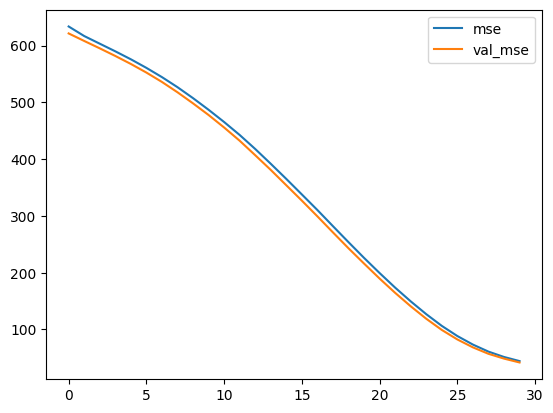

In [232]:
plt.plot(history_df['mse'], label = 'mse')
plt.plot(history_df['val_mse'], label = 'val_mse')
plt.legend();

Añade un early stopping al modelo. Pon el argumento `callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]` dentro del fit().

Visualiza el progreso de entrenamiento.

In [ ]:
capas = [keras.layers.Dense(30, 'relu', input_shape = X_train.iloc[0].shape),
         keras.layers.Dense(20, 'relu'),
         keras.layers.Dense(1)]

model = keras.models.Sequential(capas)

model.compile(tf.keras.optimizers.RMSprop(0.001),
              'mse',
              ['mae', 'mse'])

In [234]:
history = model.fit(X_train_scal,
          Y_train,
          batch_size= 32,
          epochs= 1000,
          validation_split= 0.20,
          callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/1000
8/8 [==============================] - 0s 22ms/step - loss: 38.5746 - mae: 4.9402 - mse: 38.5746 - val_loss: 36.3447 - val_mae: 4.8390 - val_mse: 36.3447
Epoch 2/1000
8/8 [==============================] - 0s 9ms/step - loss: 34.1030 - mae: 4.6475 - mse: 34.1030 - val_loss: 32.0556 - val_mae: 4.5625 - val_mse: 32.0556
Epoch 3/1000
8/8 [==============================] - 0s 10ms/step - loss: 30.3389 - mae: 4.3902 - mse: 30.3389 - val_loss: 28.1383 - val_mae: 4.2728 - val_mse: 28.1383
Epoch 4/1000
8/8 [==============================] - 0s 11ms/step - loss: 26.9946 - mae: 4.1349 - mse: 26.9946 - val_loss: 24.8338 - val_mae: 4.0168 - val_mse: 24.8338
Epoch 5/1000
8/8 [==============================] - 0s 12ms/step - loss: 24.3418 - mae: 3.8986 - mse: 24.3418 - val_loss: 22.2387 - val_mae: 3.8006 - val_mse: 22.2387
Epoch 6/1000
8/8 [==============================] - 0s 15ms/step - loss: 21.9010 - mae: 3.6771 - mse: 21.9010 - val_loss: 20.0191 - val_mae: 3.6265 - val_mse: 20.0191

In [235]:
history_df = pd.DataFrame(history.history)
history_df

,loss,mae,mse,val_loss,val_mae,val_mse
0,38.574612,4.940247,38.574612,36.344696,4.838971,36.344696
1,34.103046,4.647526,34.103046,32.055641,4.562459,32.055641
2,30.338942,4.390157,30.338942,28.138260,4.272787,28.138260
3,26.994556,4.134909,26.994556,24.833761,4.016835,24.833761
4,24.341770,3.898631,24.341770,22.238707,3.800586,22.238707
...,...,...,...,...,...,...
161,6.624812,1.793092,6.624812,6.973174,2.133592,6.973174
162,6.538172,1.789972,6.538172,7.031631,2.131828,7.031631
163,6.473680,1.781987,6.473680,6.969398,2.133060,6.969398
164,6.553112,1.800080,6.553112,6.986738,2.132140,6.986738


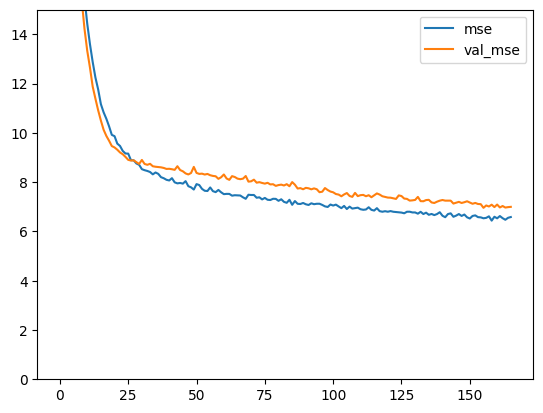

In [237]:
plt.plot(history_df['mse'], label = 'mse')
plt.plot(history_df['val_mse'], label = 'val_mse')
plt.legend()
plt.ylim(0, 15);

In [238]:
history_df['val_mse'].min()

6.958631992340088

Interpreta el gráfico

In [ ]:
#Mi modelo mejora de 7.algo a 6.95 con menos epochs (1000 vs 166)

Observamos que el entrenamiento a pesar de tener 1000 epochs ha sido detenido debido a que el error en validación ya no conseguía una mejora y por lo tanto evitamos un posible overfitting.

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [239]:
model.evaluate(X_test_scal, Y_test)

3/3 [==============================] - 1s 9ms/step - loss: 4.3638 - mae: 1.5811 - mse: 4.3638


[4.363795280456543, 1.5810902118682861, 4.363795280456543]

Ahora prueba el modelo. Coge 10 ejemplos de test y llama a` model.predict`.

In [246]:
predictions = model.predict(X_test_scal[:10, :])

1/1 [==============================] - 0s 79ms/step


In [244]:
Y_test

198    33.0
396    28.0
33     19.0
208    13.0
93     14.0
       ... 
249    19.9
225    17.5
367    28.0
175    29.0
285    17.0
Name: MPG, Length: 80, dtype: float64

In [247]:
predictions

array([[34.310665],
       [29.780277],
       [20.507196],
       [15.301115],
       [13.467333],
       [25.160936],
       [27.268991],
       [12.954533],
       [19.001823],
       [19.765272]], dtype=float32)

### Haz Predicciones

Dibuja en un scatter plot las predicciones de test vs sus true labels.

In [251]:
predictions = predictions.reshape(-1)

In [254]:
Y_test.values

array([33. , 28. , 19. , 13. , 14. , 27. , 24. , 13. , 17. , 21. , 15. ,
       38. , 26. , 15. , 25. , 12. , 31. , 17. , 16. , 31. , 22. , 22. ,
       22. , 33.5, 18. , 44. , 26. , 24.5, 18.1, 12. , 27. , 36. , 23. ,
       24. , 37.2, 16. , 21. , 19.2, 16. , 29. , 26.8, 27. , 18. , 10. ,
       23. , 36. , 26. , 25. , 25. , 25. , 22. , 34.1, 32.4, 13. , 23.5,
       14. , 18.5, 29.8, 28. , 19. , 11. , 33. , 23. , 21. , 23. , 25. ,
       23.8, 34.4, 24.5, 13. , 34.7, 14. , 15. , 18. , 25. , 19.9, 17.5,
       28. , 29. , 17. ])

In [261]:
Y_test.values[:10]

array([33., 28., 19., 13., 14., 27., 24., 13., 17., 21.])

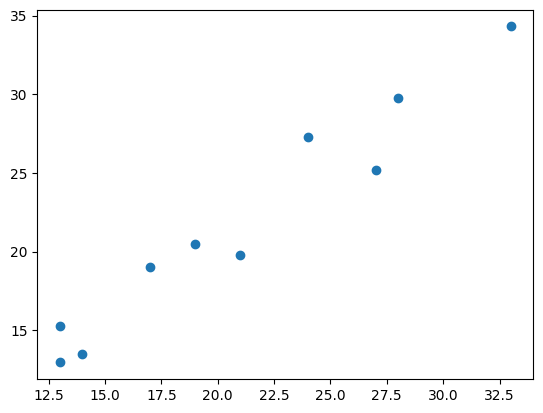

In [263]:
plt.scatter(x = Y_test.values[:10], y = predictions);

Parece que nuestro modelo predice razonablemente bien. Echemos un vistazo a la distribución de errores.

Representa los residuos en un histograma

C:\Users\misla\AppData\Local\Temp\ipykernel_27492\3993410252.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predictions - Y_test.values[:10]);


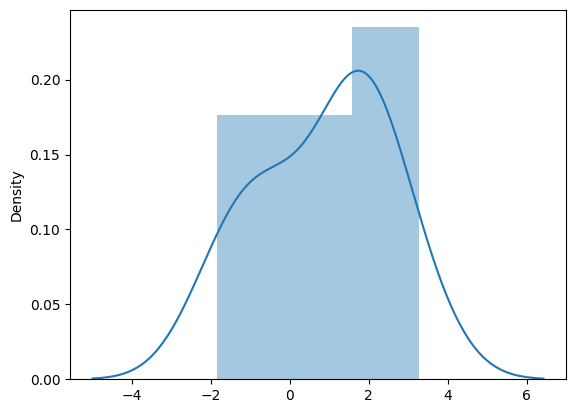

In [266]:
sns.distplot(predictions - Y_test.values[:10]);

No es del todo gaussiano, pero podríamos esperar eso porque el número de muestras es muy pequeño.

Guarda tu modelo en un archivo.

In [267]:
model.save('modelo_clases.h5')

c:\Users\misla\.pyenv\pyenv-win\versions\3.10.2\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Conclusion

Este cuaderno introdujo algunas técnicas para manejar un problema de regresión.

* El error cuadrático medio (MSE) es una función de pérdida común utilizada para problemas de regresión (se utilizan diferentes funciones de pérdida para problemas de clasificación).
* Del mismo modo, las métricas de evaluación utilizadas para la regresión difieren de la clasificación. Una métrica de regresión común es el error absoluto medio (MAE).
* Cuando las características de datos de entrada numéricos tienen valores con diferentes rangos, cada característica debe escalarse independientemente al mismo rango.
* Si no hay muchos datos de entrenamiento, una técnica es preferir una red pequeña con pocas capas ocultas para evitar el sobreajuste.
* La detención temprana es una técnica útil para evitar el sobreajuste.